# Gillespie algorithm
This algorithm is to simulate the chemical reaction process :

\begin{equation}
\nu^+_{1,j} \; X_1 + \ldots + \nu^+_{n,j} \; X_n
\xrightarrow{a_j (X)} 
\nu^-_{1,j} \; X_1 + \ldots + \nu^-_{n,j} \; X_n
\end{equation}
where $X = (X_1 \; , \ldots , \; X_n)$ are the state of the
system , each component corrresponds to the number of certain chemicals . In fact $X = X(t)$ is a stochastic process (CTDSMC) in our model .
$\nu^\pm_{i,j}$ is the number of i-th
chemical envolved in type j reaction . $a_j(X)$ is the stochastic rate of type j reaction which depends of the state $X$ . After a type j reaction happens , the state
change to $ X - u_j \equiv ( X_1 + (\nu^+_{1,j} - 
\nu^-_{1,j} \;) ,  \ldots , X_n + (\nu^+_{n,j} - \nu^-_{n,j} \; ) \in \mathbb{Z}^n$ .

Given the system is at state $x$ ,
the waiting time $\tau$ for an event/reaction happens follows $exp(\sum_{\mu = 1 }^M a_M(x))$ . Where the state goes or
says which type of reaction happens  follows the transistion probability
\begin{equation} 
p(\mu \; \rvert x) \equiv
P( x + u_\mu , d\tau  \; \rvert \; x , 0 )  = \frac{a_\mu (x) }{ \sum_{ \mu' = 1}^M a_\mu' (x) } 
\equiv \frac{ a_\mu (x)}{a_0 (x)}
\end{equation}



In [57]:
import numpy as np
import matplotlib.pyplot as plt 

We will simulate the process by genertating a sequence of
$(\tau , \mu)$ whose distribution is given by the above .
The method is use the well known method :

$\textbf{Lemma}$ If X is a continuous r.v with cdf $F$ and
$U \sim uni(0,1)$ , then
\begin{equation}
X \sim F^{-1}(U) \end{equation}
In particular for our case ,
\begin{equation}
\tau \sim - \frac{1}{a_0 (x)} \ln(U^{-1})
\end{equation}
For discrete case , the idea is similar (actually more
intuitive) , $\mu \sim N$ which satisfies
\begin{equation}
\frac{\sum_{i=1}^{N-1}  a_i}{a_0} \leq U \leq
\frac{\sum_{i=1}^{N}  a_i}{a_0} 
\end{equation}
since the probability of $U$ falls in the interval is equal to the interval length , which is just $\frac{a_N}{a_0}$ the probability of $\mu$ .

# Gene process
In the following we simulate the set of reactions:
\begin{align*}
\phi &\xrightarrow{k_M} M &\quad a_1(x)=k_M \\
M &\xrightarrow{k_p} M + P  &\quad a_2(x) = k_p M\\
M &\xrightarrow{d_M} \phi &\quad a_3(x) = d_M M\\
P &\xrightarrow{ d_p} \phi &\quad a_4(x) = d_p p
\end{align*}
With the state $X = ( M , P)$ number of mRNA and protein.

In [60]:
# rate setting
kM= 5.5
kP =1
dM= 0.5
dP=0.05

#time setting
t=0
t_end= 200000
t_sample = 10*max(1/dM , 1/dP)
'We dont want to record each reaction that happens . Instead we sample with some fix frequency   . '
'The frequency is choosen not so large so that the reaction happens (with big enough probability) during each sampling '


#initial state
Pro = 1 #promoter
M = 5 #mRNA
P = 100 #protein



In [61]:
#array for results (here we +1 so sample points are from  0 ~ 200000)
t_array = np.zeros(int( t_end/t_sample) +1 )
Pro_array = np.zeros(int( t_end/t_sample) + 1)
M_array = np.zeros( int(t_end/t_sample) +1)
P_array = np.zeros( int(t_end/t_sample) +1)

#assign initial value
j=0
t_array[j] = j
Pro_array[j] = Pro
M_array[j] = M
P_array[j] = P

In [62]:
#start the process
t=0
while t < t_end :
    #compute stochastic rate
    a = [kM*Pro , kP*M , dM*M , dP*P]
    a0 = sum(a)
    
    #genertae two uniform r.vs
    r1 , r2 = np.random.rand(2)
    
    #update time (exclude r1=0 ) according the lemma
    while r1 ==0:
        r1 = np.random.rand(1)
    t_next = (1/a0)*(  np.log(1/r1))
    t = t + t_next
    
    #determine next reaction according the lemma
    i = 0
    mu = 0
    amu = 0 
    while amu < r2*a0 : #sum up a_i until the value exceed a0*r2
        mu = mu + 1
        amu = amu + a[i]
        i = i+1
    #update the state
    if mu == 1:
        M = M+1
    elif mu ==2 :
        P = P +1
    elif mu == 3 :
        M = M-1
    else  :
        P = P-1
    
    #sample the data , if t is already out of range then stop
    if t > t_end:
        print('GG')
        break
        
    
    if t >= j*t_sample: 
        j = j+1
        t_array[j] = j
        Pro_array[j] = Pro
        M_array[j] = M
        P_array[j] = P
        print("now" , j ,"-th sample")
    

now 1 -th sample
now 2 -th sample
now 3 -th sample
now 4 -th sample
now 5 -th sample
now 6 -th sample
now 7 -th sample
now 8 -th sample
now 9 -th sample
now 10 -th sample
now 11 -th sample
now 12 -th sample
now 13 -th sample
now 14 -th sample
now 15 -th sample
now 16 -th sample
now 17 -th sample
now 18 -th sample
now 19 -th sample
now 20 -th sample
now 21 -th sample
now 22 -th sample
now 23 -th sample
now 24 -th sample
now 25 -th sample
now 26 -th sample
now 27 -th sample
now 28 -th sample
now 29 -th sample
now 30 -th sample
now 31 -th sample
now 32 -th sample
now 33 -th sample
now 34 -th sample
now 35 -th sample
now 36 -th sample
now 37 -th sample
now 38 -th sample
now 39 -th sample
now 40 -th sample
now 41 -th sample
now 42 -th sample
now 43 -th sample
now 44 -th sample
now 45 -th sample
now 46 -th sample
now 47 -th sample
now 48 -th sample
now 49 -th sample
now 50 -th sample
now 51 -th sample
now 52 -th sample
now 53 -th sample
now 54 -th sample
now 55 -th sample
now 56 -th sample
n

Text(0.5,1,'Protein hist')

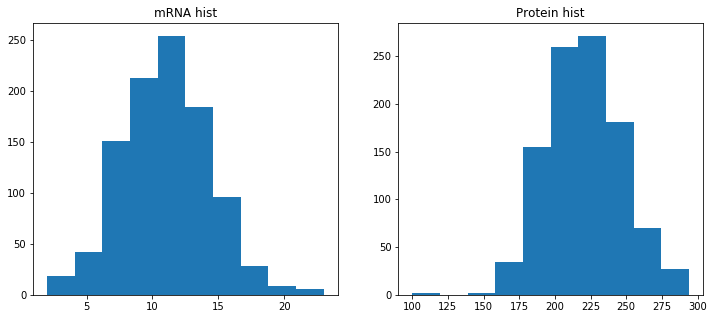

In [83]:
fig , ax = plt.subplots(1,2 ,  figsize=(12,5))
ax[0].hist(M_array)
ax[0].set_title("mRNA hist")
ax[1].hist(P_array)
ax[1].set_title("Protein hist")

Next we compare this result with the deterministic equation , which is the evolution of mean :

\begin{align*}
\frac{d E(X_M)}{dt} & = k_M - d_M E(X_M) \\
\frac{d E(X_P)}{dt} & = k_p E( X_M) -d_p E(X_P) 
\end{align*}
We can rewrite it as 

\begin{equation}
\frac{d}{dt} \begin{pmatrix}
E(X_M)\\
E(X_P) 
\end{pmatrix} =
\begin{pmatrix}
-d_M & 0 \\
k_P & -d_P
\end{pmatrix}
\begin{pmatrix}
E(X_M)\\
E(X_P) 
\end{pmatrix}
+ 
\begin{pmatrix}
k_M\\
0 
\end{pmatrix}
\end{equation}

In [64]:
import scipy.integrate as sci

In [85]:
tspan = np.arange(t_end+1)
M_0 = 5 #mRNA
P_0 = 100 #protein
def f(v,t):
    E_M, E_P = v
    return [ -dM*E_M + kM , kP*E_M - dP*E_P ]
t_deter = sci.odeint( f , ( M_0, P_0) , tspan)

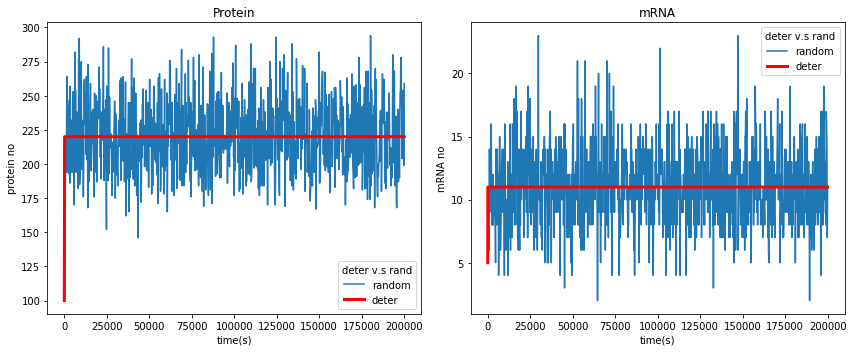

In [86]:
#Comparison
fig , ax = plt.subplots(1,2 ,  figsize=(12,5))
ax[0].set_title("Protein")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('protein no')

ax[0].plot( t_sample * t_array , P_array , label = "random" )
ax[0].plot( t_deter[:,1] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[0].legend(title = "deter v.s rand")

ax[1].set_title("mRNA")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('mRNA no')

ax[1].plot( t_sample * t_array , M_array , label = "random" )
ax[1].plot( t_deter[:,0] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[1].legend(title = "deter v.s rand")
#more space between subplots
plt.tight_layout()

